# Python Solar Tutorial: [Interface Region Imager Spectrograph](https://iris.lmsal.com) (IRIS) Image Data Analysis
In this tuturial you will learn to: 
* How to open IRIS datasets.
* How to vizualize 3D solar data stored in fits files.
* How to contruct animations of the 3D solar data. 
* How to correct intensity variations due to exposure changes

## Before Starting: Creating a Python Envioronment using Conda
The first step towards analysing the solar data from the IRIS instrument will be to create an isolated instance of Python used for this specific project. Such an intance is refered to as an [environment](https://docs.conda.io/projects/conda/en/latest/user-guide/concepts/environments.html). The benefit of using an environment is that any code written inside it should persist the test of time. In other words, by creating an isolated version of Python and necesary libraries we have complete control of the versions of the software, such that the code will always run as intended. 

Copy and paste the following piece of code in your terminal window: 
```
    conda create -n solar_tutorial 
    
    conda config --add channels conda-forge
    conda config --set channel_priority strict
    
    conda install sunpy sunkit-instruments
    conda install -c conda-forge notebook
    conda install -c conda-forge ipywidgets 
    conda install -c conda-forge ffmpeg
```

The `conda create` command creates the environment `solar_tutorial` with a version of [`sunpy`](https://sunpy.org) and [`sunkit-insruments`](https://docs.sunpy.org/projects/sunkit-instruments/en/latest/index.html), and their dependencies like [`scipy`](https://scipy.org), [`numpy`](https://numpy.org), [`matplotlib`](https://matplotlib.org), and [`astropy`](https://www.astropy.org). Additionally, we install the necesary requirements to use the [`jupyter notebook`](https://jupyter.org) environment. 

Now we can call the `conda activate` command in your terminal to activate that environment: 
```
     conda activate solar_tutorial
```

__Remember to run this code before attempting to run the notebook.__ This should now allow you to use this notbook properly

## Getting started: Importing the necesary functions

In [1]:
from sunkit_instruments import iris      # used to open IRIS data into a sunpy.map object
import sunpy.map as smap                 # used to work with sunpy.map objects
import numpy as np                       # used to manipulate N-D arrays 
import matplotlib.pyplot as plt          # used to create and manipulate figures and axes
import matplotlib.animation as animation # used to create and manipulate animation
import matplotlib as mpl                 # used for general ploting purposes

## Open the IRIS dataset into a `sunpy.map` object

Define useful directories: 
* `datadir`  - directory with stored fits data files. 
* `outdir`   - directory where we store media from this notebook. 
Define the data file name: 
* `dataname` - name of the specific IRIS dataset we downloaded. 

In [2]:
datadir  = '/Users/maco7096/Documents/CU/2022-2023/DS2_WORKSHOP/Presentation/data/'
outdir   = '/Users/maco7096/Documents/CU/2022-2023/DS2_WORKSHOP/Presentation/media/'
dataname = 'iris_l2_20170910_125947_3660109533_SJI_1330_t000.fits'

Now we can open the dataset into a `sunpy` `map` object. 

In [3]:
sjiMap = iris.SJI_to_sequence(datadir+dataname)

Iniside of the `map` object we can find both the IRIS Slit-Jaw Imager data, and the Coordinate System metadata. 

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


For frame 'heliographic_stonyhurst' the following metadata is missing: hgln_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is missing: crlt_obs,crln_obs
 [sunpy.map.mapbase]


Observatory,IRIS
Instrument,SJI
Detector,SJI
Measurement,1330.0 Angstrom
Wavelength,1330.0 Angstrom
Observation Date,2017-09-10 12:59:52
Exposure Time,8.00006 s
Dimension,[402. 388.] pix
Coordinate System,helioprojective
Scale,[0.3327 0.3327] arcsec / pix
Reference Pixel,[200.5 193.5] pix

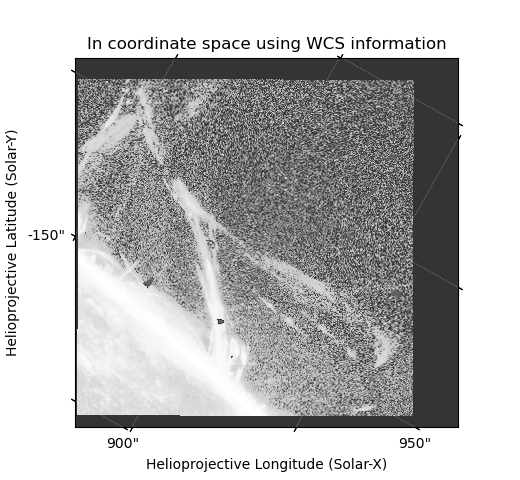
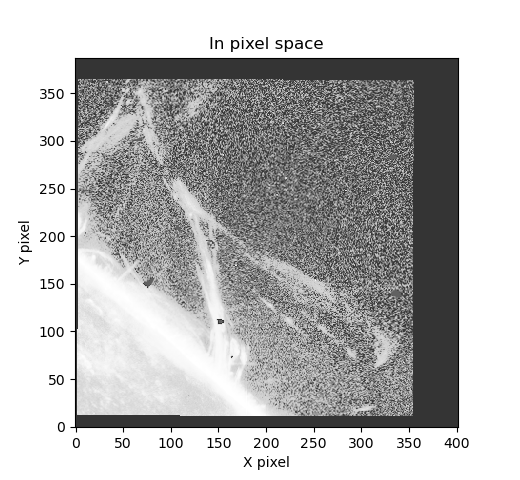
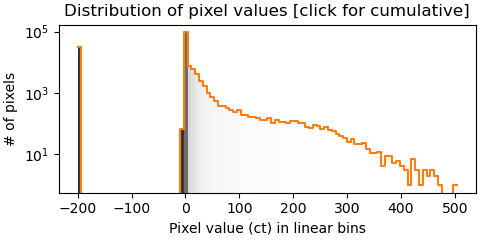
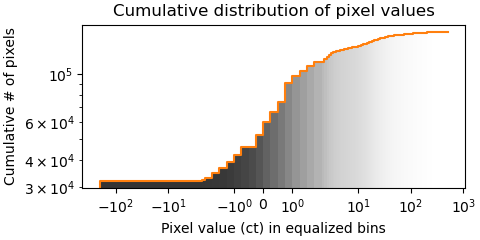

In [4]:
sjiMap[0]

## Visualize the original dataset as an animation

In order to create the animation with [ffmpeg](https://www.ffmpeg.org/download.html), we will need to download the software by following the link. __Saving an animation from Python will take some time.__

The following sniped of code should work; yet, we will not run it because of time constraints. Instead, we will show the results of the command. 
```
    ani = sjiMap.plot()
    Writer = animation.writers['ffmpeg']   
    writer = Writer(fps=50, metadata=dict(artist='SunPy'), bitrate=1800) 
    ani.save(outdir+'original_SJI_flare.mp4', writer=writer)  
```    

## Why do we see the image getting darker at times? 
* Let us exract the dataset and construct our own visualizations 
* We will use the matplotlib subplots method to construct visualizations. 

First lets extract the data and define some useful varibles

In [5]:
# IRIS SJI Data in a numpy array
sjiMap_arr = sjiMap.as_array() 

In [6]:
# IRIS SJI image intensity 
intensity  = np.zeros(sjiMap_arr[0,0,:].shape,dtype = float) 
# IRIS observation time
obsr_time  = np.zeros(sjiMap_arr[0,0,:].shape,dtype = 'U23')

In [7]:
for i in range(len(sjiMap_arr[0,0,:])): 
    intensity[i]  = sjiMap_arr[:,:,i][sjiMap_arr[:,:,i]>=0].sum()
    obsr_time[i]  = sjiMap[i].date.value

__Why does the image contrast change? Throught the flare the intensity range changes dramatically.__ 

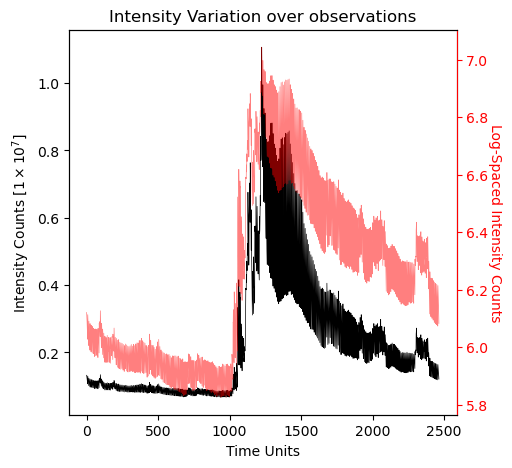

In [8]:
%matplotlib inline
fig,ax = plt.subplots(figsize=(5,5))

ax.set_title('Intensity Variation over observations')
ax.set_ylabel('Intensity Counts [$1\\times 10^7$]')
ax.set_xlabel('Time Units')

axt = ax.twinx()
axt.spines['right'].set_color('red')
axt.tick_params(axis='y', colors='red')
axt.set_ylabel('Log-Spaced Intensity Counts',rotation = 270,labelpad = 10,color = 'red')

axt.plot(np.log10(intensity),color = 'red',linewidth = 0.5, linestyle = 'solid',alpha = 0.5,zorder = 1)
ax.plot(intensity*1e-7,color = 'k',linewidth = 0.5, linestyle = 'solid',zorder = 2)

## Let's Improve the visualization

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


For frame 'heliographic_stonyhurst' the following metadata is missing: hgln_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is missing: crlt_obs,crln_obs
 [sunpy.map.mapbase]
/var/folders/kj/cn46b9654vg4317fw7q7whyh00_sgw/T/ipykernel_6736/813035129.py:20: RuntimeWarning: divide by zero encountered in log10
  sub2.imshow(np.log10(sjiMap_arr[:,:,max_I]),origin='lower',vmin= 0,vmax =3,cmap = sjiMap[0].cmap)
/var/folders/kj/cn46b9654vg4317fw7q7whyh00_sgw/T/ipykernel_6736/813035129.py:20: RuntimeWarning: invalid value encountered in log10
  sub2.imshow(np.log10(sjiMap_arr[:,:,max_I]),origin='lower',vmin= 0,vmax =3,cmap = sjiMap[0].cmap)


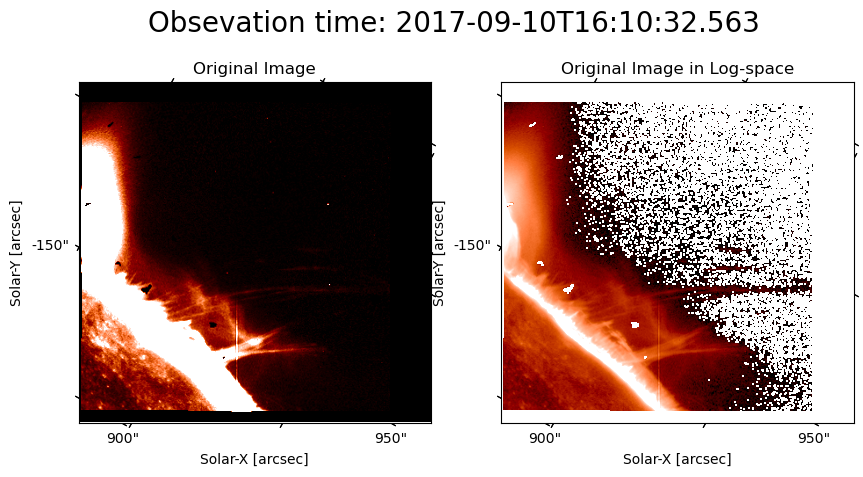

In [9]:
%matplotlib inline
max_I = np.argmax(intensity)
fig,axs = plt.subplots(1,2,figsize=(10,5),subplot_kw={"projection": sjiMap[i].wcs})

sub1 = axs[0]
sub2 = axs[1]

fig.suptitle(f'Obsevation time: {obsr_time[max_I]}',fontsize = 20)

sub1.set_xlabel('Solar-X [arcsec]')
sub2.set_xlabel('Solar-X [arcsec]')

sub1.set_ylabel('Solar-Y [arcsec]')
sub2.set_ylabel('Solar-Y [arcsec]')

sub1.set_title('Original Image')
sub2.set_title('Original Image in Log-space')

sub1.imshow(sjiMap_arr[:,:,max_I],origin='lower',vmin= 0,vmax =50,cmap = sjiMap[0].cmap)
sub2.imshow(np.log10(sjiMap_arr[:,:,max_I]),origin='lower',vmin= 0,vmax =3,cmap = sjiMap[0].cmap)



Now let us visualize the flare images as 3D plots. To do so we need the `x` and `y` coordinates of the IRIS maps. 

In [10]:
coords_Tx = smap.all_coordinates_from_map(sjiMap[0]).Tx
coords_Ty = smap.all_coordinates_from_map(sjiMap[0]).Ty

In [11]:
%matplotlib
fig,axs = plt.subplots(1,2, subplot_kw={"projection": "3d"},figsize = (10,5))

sub1 = axs[0]
sub2 = axs[1]

i = np.argmax(intensity) 

fig.suptitle(f'Obsevation time: {obsr_time[i]}',fontsize = 20)

sub1.set_zlim((-200,16200))
sub2.set_zlim((0,4))

sub1.set_zlabel('Intensity Counts')
sub2.set_zlabel('Log-Spaced Intensity Counts')

sub1.set_xlabel('Solar-X [arcsec]')
sub2.set_xlabel('Solar-X [arcsec]')

sub1.set_ylabel('Solar-Y [arcsec]')
sub2.set_ylabel('Solar-Y [arcsec]')

Z1 = sjiMap_arr[:,:,i]
sub1.plot_surface(coords_Tx, coords_Ty, Z1, cmap=sjiMap[0].cmap, linewidth=0, antialiased=False)
sub2.plot_surface(coords_Tx, coords_Ty, np.log10(Z1), cmap=sjiMap[0].cmap, linewidth=0, antialiased=False)

plt.show()

Using matplotlib backend: <object object at 0x1541c4e30>


/var/folders/kj/cn46b9654vg4317fw7q7whyh00_sgw/T/ipykernel_6736/3822720659.py:25: RuntimeWarning: divide by zero encountered in log10
  sub2.plot_surface(coords_Tx, coords_Ty, np.log10(Z1), cmap=sjiMap[0].cmap, linewidth=0, antialiased=False)
/var/folders/kj/cn46b9654vg4317fw7q7whyh00_sgw/T/ipykernel_6736/3822720659.py:25: RuntimeWarning: invalid value encountered in log10
  sub2.plot_surface(coords_Tx, coords_Ty, np.log10(Z1), cmap=sjiMap[0].cmap, linewidth=0, antialiased=False)


We can also combine different plots into a `mosaic`

In [12]:
def time_hhmm(axs,time_strs,fsizes,flag_label = 0): 
# Inputs - 
# axs: Matplotlib axes ploting object where the time-series will be plotted
# time_str: array with Astropy time object for time-series 
# fsizes: font size for axis labels
# Keywords - flag_label: identifies whether the ticks labels have to be modified into hh:mm format  
# Outputs - axs: Matplotlib axes object with axis labels modified 
# Functionality - Modifies the Matplotlib axes object to change time from minutes to hh:mm UTC format and increases fonts

    if flag_label == 0: 
        ticks  = axs.get_xticks()             # get automated x-axis label ticks
        labels = time_strs[ticks.astype(int)]             # change the labels from minute to Astropy date object format 

        for i in range(len(labels)): 
            labels[i] = labels[i][11:16]      # extract hh:mm string from full date string

        axs.set_xticks(ticks)                 # change axis ticks
        axs.set_xticklabels(labels)           # change axis ticks labels 
    
    axs.tick_params(labelsize = fsizes)   # change the font size of the axis labels
    
    axs.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator()) # automatically find the minor ticks
    axs.tick_params(which='both', width=3)                     # plots both ticks with thick line
    axs.tick_params(which='major', length=10)                  # plots the major axis with a longer line
    axs.tick_params(which='minor', length=7, color= 'gray')    # plots the major axis with a shorter line
    
    return axs 

/var/folders/kj/cn46b9654vg4317fw7q7whyh00_sgw/T/ipykernel_6736/3349988165.py:34: RuntimeWarning: divide by zero encountered in log10
  sub3.imshow(np.log10(sjiMap_arr[:,:,max_I]),origin='lower',vmin= 0,vmax =4,cmap = sjiMap[0].cmap)
/var/folders/kj/cn46b9654vg4317fw7q7whyh00_sgw/T/ipykernel_6736/3349988165.py:34: RuntimeWarning: invalid value encountered in log10
  sub3.imshow(np.log10(sjiMap_arr[:,:,max_I]),origin='lower',vmin= 0,vmax =4,cmap = sjiMap[0].cmap)


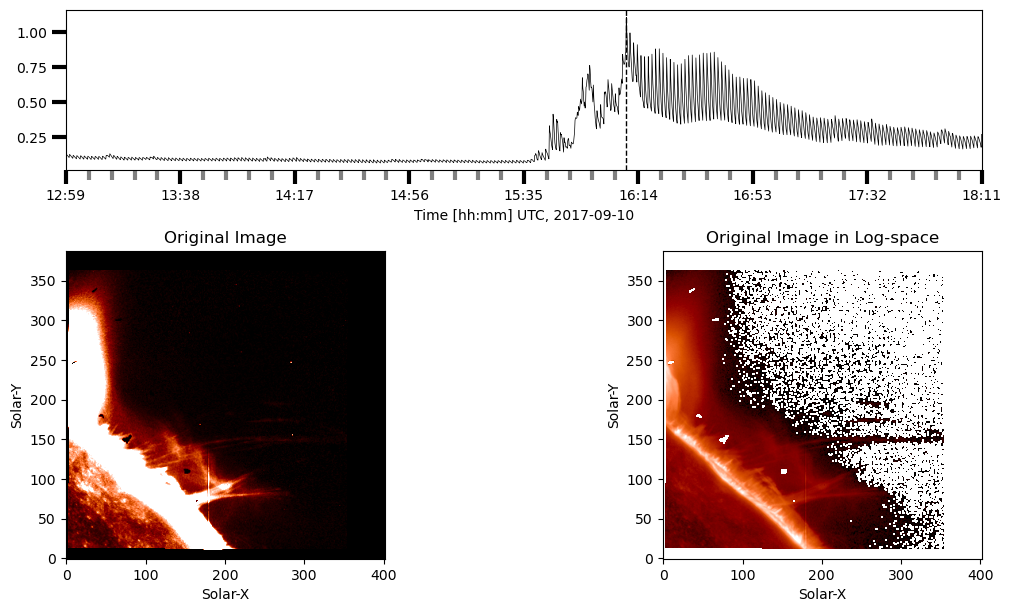

In [13]:
plt.close('all')
%matplotlib inline
axd = plt.figure(figsize=(10, 6),constrained_layout=True).subplot_mosaic(
    """
    AAAAA
    BB.CC
    BB.CC
    """)


sub1 = axd['A']
sub2 = axd['B']
sub3 = axd['C']

sub2.set_title('Intensity Counts')
sub3.set_title('Log-Spaced Intensity Counts')

sub2.set_xlabel('Solar-X')
sub3.set_xlabel('Solar-X')

sub2.set_ylabel('Solar-Y')
sub3.set_ylabel('Solar-Y')

sub2.set_title('Original Image')
sub3.set_title('Original Image in Log-space')

sub1.axvline(max_I, ymin = 0, ymax = 1, color = 'k',linewidth = 1,linestyle = 'dashed')
sub1.plot(intensity*1e-7,color = 'k',linewidth = 0.5, linestyle = 'solid',zorder = 2)
sub1.set_xlim(0,2000)
sub1 = time_hhmm(sub1,obsr_time,10,flag_label = 0)
sub1.set_xlabel(f'Time [hh:mm] UTC, {str(obsr_time[0])[:-13]}')

sub2.imshow(sjiMap_arr[:,:,max_I],origin='lower',vmin= 0,vmax =50,cmap = sjiMap[0].cmap)
sub3.imshow(np.log10(sjiMap_arr[:,:,max_I]),origin='lower',vmin= 0,vmax =4,cmap = sjiMap[0].cmap)

plt.show()

__At the end of each session remember to deactivate the environment we are working in.__ To do so type the folowing in your ternminal:

```
     conda deactivate 
```

Here is a script that will allow you to create an animation of the last plot using matplotlib. __Doing so in a notebook makes plotting very slow.__ The `iris_plots.py` script is an example of how to create plots that can be turned into animations using an external program like `QuickTime Player`. 
```
def updatefig(i,fig=fig,sub1=sub1,sub2=sub2,sjiMap_arr=sjiMap_arr,median_int=median_int,coords_Tx=coords_Tx,coords_Ty=coords_Ty,obsr_time=obsr_time):
    
    fig.suptitle(f'Obsevation time: {obsr_time[i]}',
    fontsize = 20)
    
    sub1.set_zlim((-200,16200))
    sub2.set_zlim((0,4))

    Z1 = sjiMap_arr[:,:,i]
    Z2 = np.log10(sjiMap_arr[:,:,i])
    
    surf1 = sub1.plot_surface(coords_Tx, coords_Ty, Z1, 
    cmap=sjiMap[0].cmap, linewidth=0, antialiased=False)
    surf2 = sub2.plot_surface(coords_Tx, coords_Ty, Z2, 
    cmap=sjiMap[0].cmap, linewidth=0, antialiased=False)
    
    return sub1, sub2

Writer = animation.writers['ffmpeg']   
writer1 = Writer(fps=30) 
ani.save(outdir+'intensity3D_flare.mp4', writer=writer1)  
```